In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.cluster import KMeans
%matplotlib inline
import seaborn as sns
import pickle

In [40]:
df = pd.read_csv("__thoughts__/workingdf.csv", index_col=0)
df.columns

Index(['Gender', 'Age (in years)', 'Country of residence', 'Living area',
       'Children', 'Job', 'Small-scale_NEUTRAL', 'Large-scale_NEUTRAL',
       'Total conform', 'Risk6', 'Small-scale_COVID19', 'Large-scale_COVID19',
       'Education_cat'],
      dtype='object')

I divide the dataframe in 4 peaces to test 4 Supervised Machine Learning Models:


**FEATURES**: 


- 'Gender'
- 'Age (in years)'
- 'Country of residence', 
- 'Living area',
- 'Children',
- 'Total conform', 
- 'Risk6', 
- 'Education_cat', 
- 'Job_1.0', 'Job_2.0', 'Job_3.0', 'Job_4.0', 'Job_5.0', 'Job_6.0', 'Job_7.0'
   
   
   
   
**TARGETS**:

### 1.- 'Small-scale_NEUTRAL'

### 2.- 'Large-scale_NEUTRAL'

### 3.- 'Small-scale_COVID'

### 4.- 'Large-scale_COVID'

 To analyse run these models, I turn two features into binomial values through get_dummies, then I study correlation

In [41]:
df = pd.get_dummies(data= df, columns=["Country of residence"])
df = pd.get_dummies(data = df, columns = ["Job"])

In [42]:
df.columns

Index(['Gender', 'Age (in years)', 'Living area', 'Children',
       'Small-scale_NEUTRAL', 'Large-scale_NEUTRAL', 'Total conform', 'Risk6',
       'Small-scale_COVID19', 'Large-scale_COVID19', 'Education_cat',
       'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5', 'Job_1', 'Job_2', 'Job_3', 'Job_4', 'Job_5',
       'Job_6', 'Job_7'],
      dtype='object')

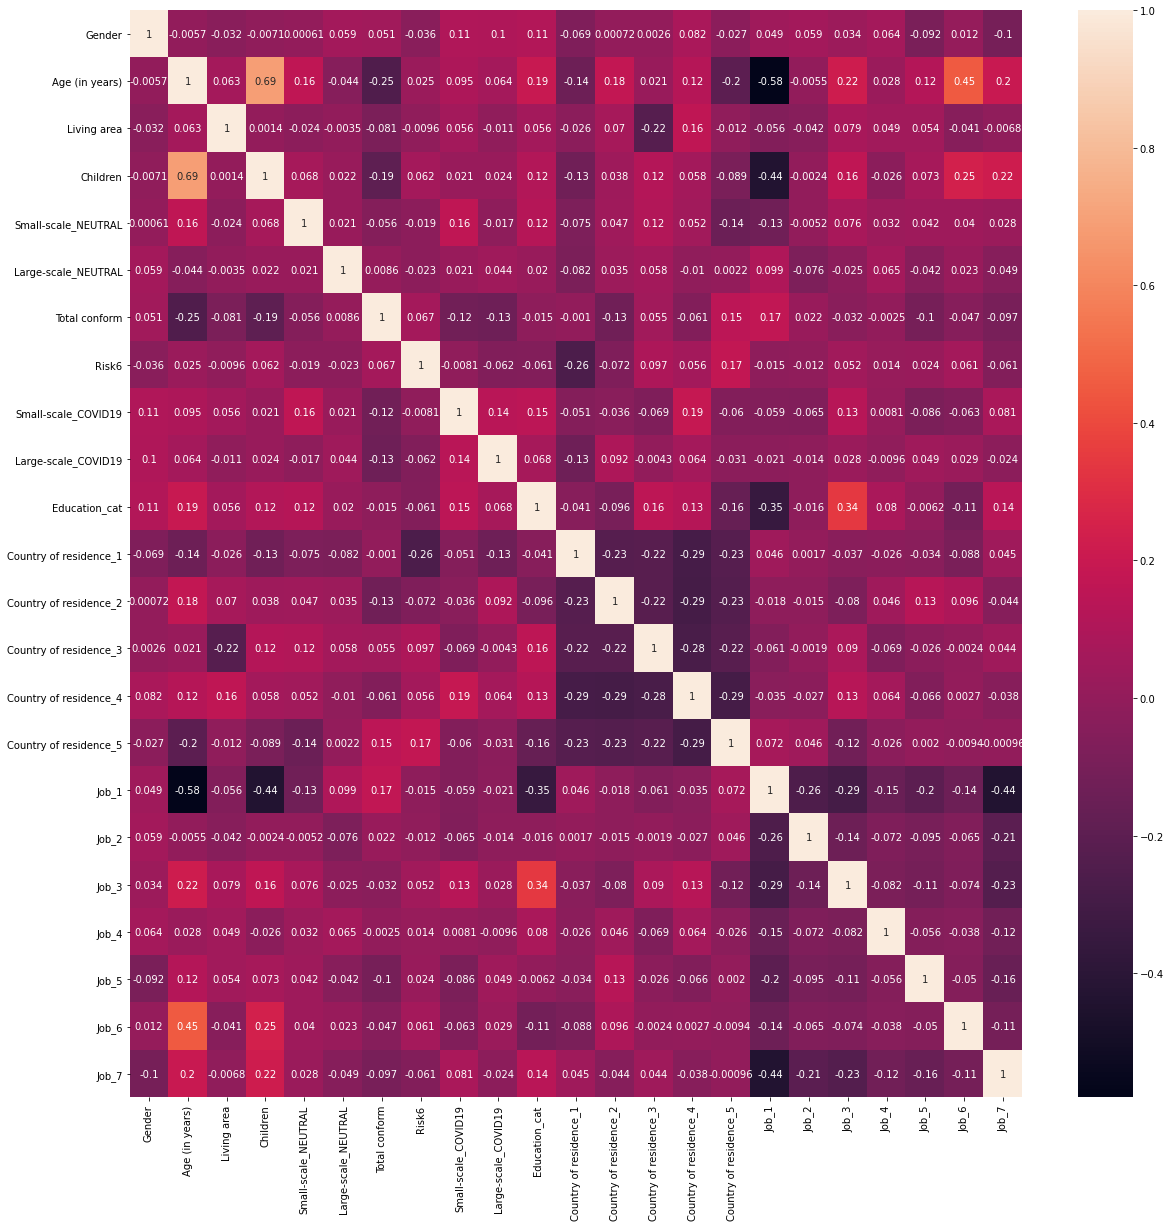

In [43]:
fig, ax = plt.subplots(figsize=(20,20))         
corr = df.corr()
sns.heatmap(corr, annot = True)

**I split the dataset into the four models I want to test: for all of them I will run supervised ml classifications models. 
In order to clean up my results, I do not include in this document each correlation matrix (that was performed for each model), all the models that were test nor grid search that was performed for each one**

**For the last model I also run an unsupervised cluster ML model**

**Finally I test all the targets together with a supervised multilabel ML model**

In [44]:
small_scaleN = df[['Gender', 'Age (in years)', 'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5', 'Living area',
       'Children', 
       'Total conform', 'Risk6', 'Education_cat', 'Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7', 'Small-scale_NEUTRAL']]

In [45]:
X_SMN = small_scaleN[['Gender', 'Age (in years)', 'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5', 'Living area',
       'Children', 
       'Total conform', 'Risk6', 'Education_cat', 'Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7']]
y_SMN = small_scaleN[['Small-scale_NEUTRAL']]

In [46]:
small_scaleC = df[['Gender', 'Age (in years)', 'Living area',
       'Children', 
       'Total conform', 'Risk6', 'Education_cat', 'Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7', 'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5','Small-scale_COVID19',]]

In [47]:
X_SMC = small_scaleC[['Gender', 'Age (in years)', 'Living area',
       'Children', 
       'Total conform', 'Risk6', 'Education_cat', 'Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7', 'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5']]
y_SMC = small_scaleC[['Small-scale_COVID19']]

In [48]:
large_scaleN = df[['Gender', 'Age (in years)', 'Living area',
       'Children',
       'Total conform', 'Risk6', 'Education_cat', 'Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7', 'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5', 'Large-scale_NEUTRAL']]

In [49]:
X_LSN = large_scaleN[['Gender', 'Age (in years)', 'Living area',
       'Children',
       'Total conform', 'Risk6', 'Education_cat', 'Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7', 'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5']]
y_LSN = large_scaleN[['Large-scale_NEUTRAL']]

In [50]:
large_scaleC=df[['Gender', 'Age (in years)', 'Living area',
       'Children',
       'Total conform', 'Risk6', 'Education_cat', 'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5','Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7', 'Large-scale_COVID19']]

In [51]:
X_LSC = large_scaleC[['Gender', 'Age (in years)', 'Living area',
       'Children', 
       'Total conform', 'Risk6', 'Education_cat', 'Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7', 'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5']]
y_LSC = large_scaleC[['Large-scale_COVID19']]

## Supervised MLC models

### SMALL SCALE NEUTRAL

In [52]:
X_trainSMN, X_testSMN, y_trainSMN, y_testSMN  = train_test_split(X_SMN ,y_SMN,test_size = 0.2)

In [53]:
X_trainSMN.columns

Index(['Gender', 'Age (in years)', 'Country of residence_1',
       'Country of residence_2', 'Country of residence_3',
       'Country of residence_4', 'Country of residence_5', 'Living area',
       'Children', 'Total conform', 'Risk6', 'Education_cat', 'Job_1', 'Job_2',
       'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7'],
      dtype='object')

In [54]:
SMNmodel = KNeighborsClassifier(algorithm= 'kd_tree', n_neighbors= 10, p = 1, weights= 'distance')
SMNmodel.fit(X_trainSMN,y_trainSMN.values.ravel())
y_predSMN = SMNmodel.predict(X_testSMN)


In [55]:
print("Accuracy",round(accuracy_score(y_testSMN, y_predSMN),3))
print("Precision",round(precision_score(y_testSMN,y_predSMN,average = 'weighted'),3))
print("Recall",round(recall_score(y_testSMN, y_predSMN, average = 'weighted'),3))
print("F1Score",round(f1_score(y_testSMN, y_predSMN, average = 'weighted'),3))
print("ClassificationRepport:\n\n", classification_report(y_testSMN, y_predSMN))


Accuracy 0.771
Precision 0.676
Recall 0.771
F1Score 0.701
ClassificationRepport:

               precision    recall  f1-score   support

           1       0.25      0.04      0.07        23
           2       0.79      0.97      0.87        86

    accuracy                           0.77       109
   macro avg       0.52      0.50      0.47       109
weighted avg       0.68      0.77      0.70       109



In [56]:
scores = cross_val_score(SMNmodel, X_SMN, y_SMN.values.ravel(), cv=15)
print(f"acccuracy={np.mean(scores)}")

acccuracy=0.7695695695695696


Save the model using pickle

In [57]:
saved_SMNmodel = pickle.dumps(SMNmodel)

### SMALL SCALE COVID-19

In [22]:
X_trainSMC, X_testSMC, y_trainSMC, y_testSMC  = train_test_split(X_SMC ,y_SMC,test_size = 0.2)

In [23]:
SMCmodel = RandomForestClassifier(bootstrap= True, max_depth= 10, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 2, n_estimators = 200)
SMCmodel.fit(X_trainSMC,y_trainSMC.values.ravel())
y_predSMC = SMNmodel.predict(X_testSMC)

In [24]:
print("Accuracy",round(accuracy_score(y_testSMC, y_predSMC),3))
print("Precision",round(precision_score(y_testSMC,y_predSMC,average = 'weighted'),3))
print("Recall",round(recall_score(y_testSMC, y_predSMC, average = 'weighted'),3))
print("F1Score",round(f1_score(y_testSMC, y_predSMC, average = 'weighted'),3))
print("ClassificationRepport:\n\n", classification_report(y_testSMC, y_predSMC))


Accuracy 0.789
Precision 0.623
Recall 0.789
F1Score 0.696
ClassificationRepport:

               precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.79      1.00      0.88        86

    accuracy                           0.79       109
   macro avg       0.39      0.50      0.44       109
weighted avg       0.62      0.79      0.70       109



In [25]:
scores = cross_val_score(SMCmodel, X_SMC, y_SMC.values.ravel(), cv=15)
print(f"acccuracy={np.mean(scores)}")

acccuracy=0.7804304304304305


save the model using pickle

In [28]:
saved_SMCmodel = pickle.dumps(SMCmodel)

### LARGE SCALE NEUTRAL

In [29]:
X_trainLSN, X_testLSN, y_trainLSN, y_testLSN  = train_test_split(X_LSN ,y_LSN,test_size = 0.2)

In [30]:
LSNmodel = RandomForestClassifier(bootstrap= True, max_depth= 10, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 2, n_estimators = 200)
LSNmodel.fit(X_trainLSN,y_trainLSN.values.ravel())
y_predLSN = LSNmodel.predict(X_testLSN)

In [31]:
print("Accuracy",round(accuracy_score(y_testLSN, y_predLSN),3))
print("Precision",round(precision_score(y_testLSN, y_predLSN,average = 'weighted'),3))
print("Recall",round(recall_score(y_testLSN, y_predLSN, average = 'weighted'),3))
print("F1Score",round(f1_score(y_testLSN, y_predLSN, average = 'weighted'),3))
print("ClassificationRepport:\n\n", classification_report(y_testLSN, y_predLSN))


Accuracy 0.936
Precision 0.876
Recall 0.936
F1Score 0.905
ClassificationRepport:

               precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.94      1.00      0.97       102

    accuracy                           0.94       109
   macro avg       0.47      0.50      0.48       109
weighted avg       0.88      0.94      0.90       109



In [32]:
scores = cross_val_score(SMCmodel, X_LSN, y_LSN.values.ravel(), cv=15)
print(f"acccuracy={np.mean(scores)}")

acccuracy=0.9096596596596596


Save the model using pickle

In [33]:
saved_LSNmodel = pickle.dumps(LSNmodel)

### LARGE SCALE COVID-19

In [34]:
X_trainLSC, X_testLSC, y_trainLSC, y_testLSC  = train_test_split(X_LSC,y_LSC,test_size = 0.2)

In [35]:
LSCmodel = RandomForestClassifier(bootstrap= True, max_depth= 10, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 2, n_estimators = 200)
LSCmodel.fit(X_trainLSC,y_trainLSC.values.ravel())
y_predLSC = LSCmodel.predict(X_testLSC)

In [36]:
print("Accuracy",round(accuracy_score(y_testLSC, y_predLSC),3))
print("Precision",round(precision_score(y_testLSC, y_predLSC,average = 'weighted'),3))
print("Recall",round(recall_score(y_testLSC, y_predLSC, average = 'weighted'),3))
print("F1Score",round(f1_score(y_testLSC, y_predLSC, average = 'weighted'),3))
print("ClassificationRepport:\n\n", classification_report(y_testLSC, y_predLSC))


Accuracy 0.477
Precision 0.484
Recall 0.477
F1Score 0.477
ClassificationRepport:

               precision    recall  f1-score   support

           1       0.52      0.44      0.48        59
           2       0.44      0.52      0.48        50

    accuracy                           0.48       109
   macro avg       0.48      0.48      0.48       109
weighted avg       0.48      0.48      0.48       109



In [37]:
scores = cross_val_score(LSCmodel, X_LSC, y_LSC.values.ravel(), cv=15)
print(f"acccuracy={np.mean(scores)}")

acccuracy=0.47042042042042037


save the model using pickle

In [38]:
saved_LSCmodel = pickle.dumps(LSCmodel)

## Unsupervised MLC model for Large-scale Covid-19 dataset
### What's going on?


In [31]:
def onezero(x):
    if x == 2:
        return 0
    else:
        return x

In [32]:
large_scaleC["Large-scale_COVID19"] = large_scaleC["Large-scale_COVID19"].apply(onezero)

In [33]:
large_scaleC.columns

Index(['Gender', 'Age (in years)', 'Living area', 'Children', 'Total conform',
       'Risk6', 'Education_cat', 'Country of residence_1',
       'Country of residence_2', 'Country of residence_3',
       'Country of residence_4', 'Country of residence_5', 'Job_1', 'Job_2',
       'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7', 'Large-scale_COVID19'],
      dtype='object')

In [34]:
model = KMeans(n_clusters=2)
labels = model.fit_predict(large_scaleC.drop(columns=['Country of residence_1',
       'Country of residence_2', 'Country of residence_3',
       'Country of residence_4', 'Country of residence_5']))
large_scaleC["label"] = labels
large_scaleC.head()
large_scaleC["label"].value_counts()
large_scaleC["Large-scale_COVID19"].value_counts()

1    283
0    259
Name: Large-scale_COVID19, dtype: int64

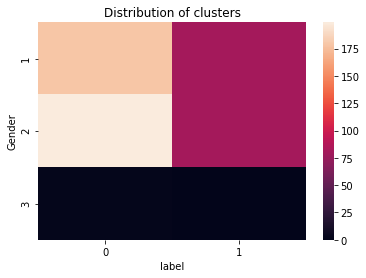

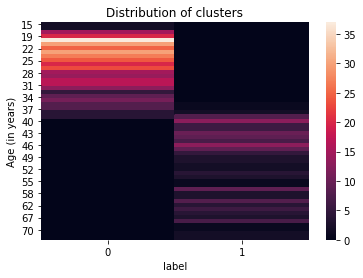

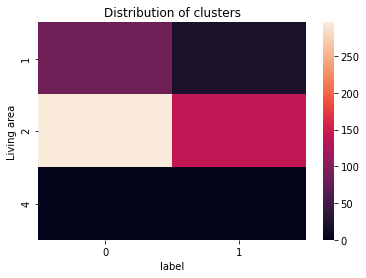

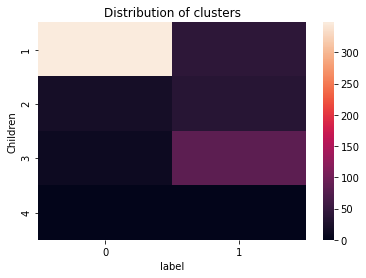

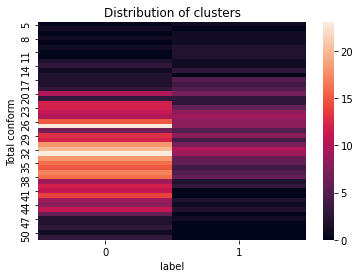

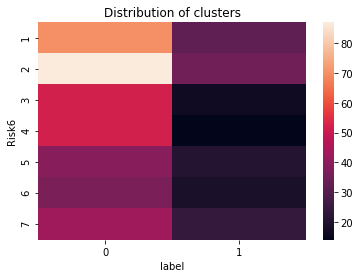

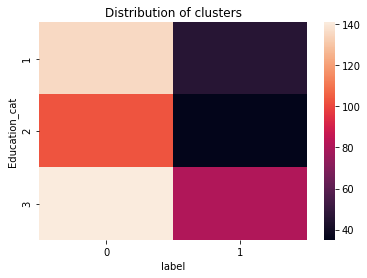

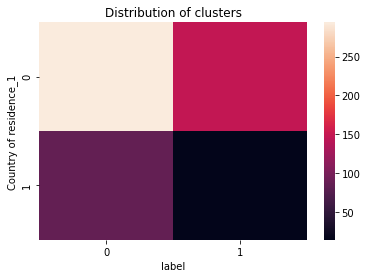

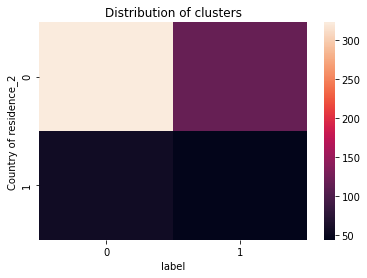

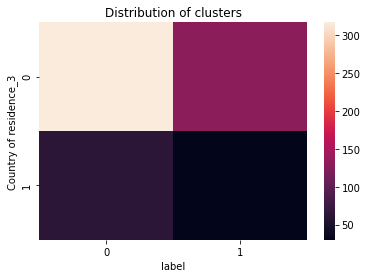

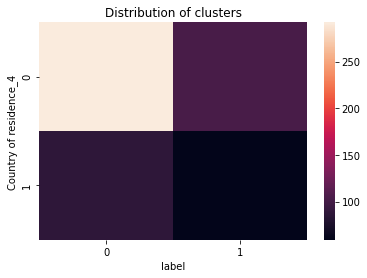

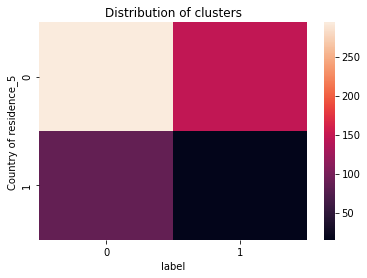

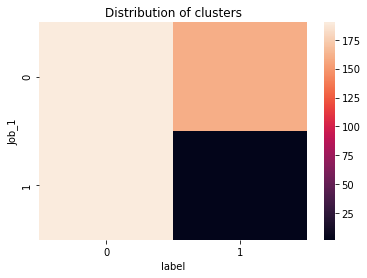

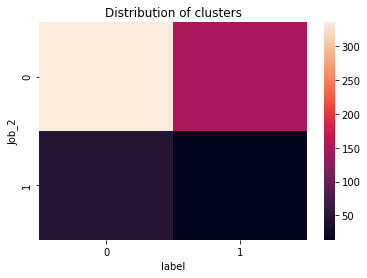

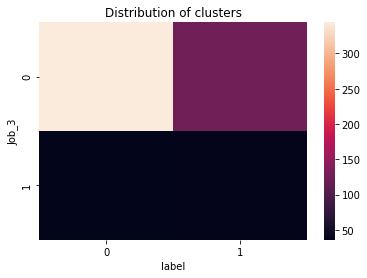

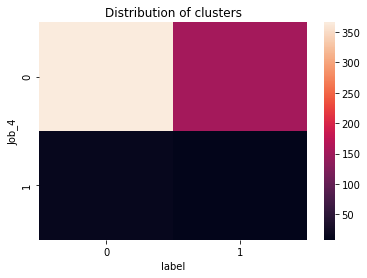

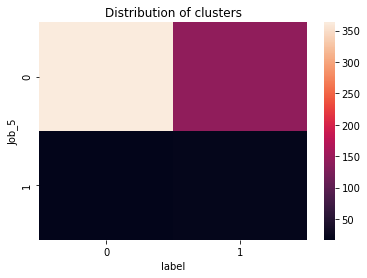

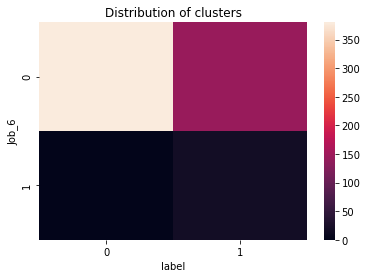

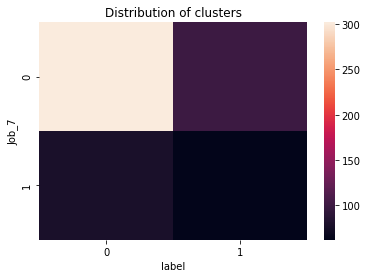

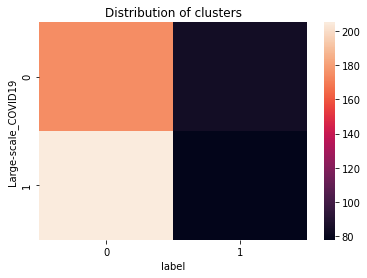

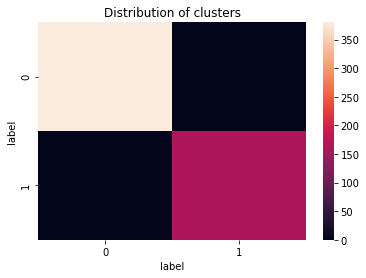

In [36]:
for col in large_scaleC.columns:
    plt.figure()
    ct = pd.crosstab(large_scaleC[col],large_scaleC["label"])
    plt.title("Distribution of clusters")
    sns.heatmap(ct)

## EXPLORING OTHER OPTIONS: FINALLY MULTILABEL MODEL WITH THE FOUR PREDICTIONS


In [37]:
X = df[['Gender', 'Age (in years)', 'Living area', 'Children','Total conform', 'Risk6','Education_cat', 'Job_1',
       'Job_2', 'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7',
       'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5']]
y = df[['Small-scale_NEUTRAL', 'Large-scale_NEUTRAL','Small-scale_COVID19', 'Large-scale_COVID19']]

In [38]:
X_train, X_test, y_train, y_test  = train_test_split(X, y,test_size = 0.2)


In [39]:
model = KNeighborsClassifier(algorithm= 'kd_tree', n_neighbors= 10, p = 1, weights= 'distance')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy",round(accuracy_score(y_test, y_pred),3))


Accuracy 0.174


In [40]:
scores = cross_val_score(model, X, y, cv=15)
print(f"acccuracy={np.mean(scores)}")

acccuracy=0.2930930930930931


# TO TEST THE MODELS WITH NEW DATA

**Structuring new data**

In [57]:
test = pd.read_csv("__thoughts__/testingModels.csv", sep = ";", index_col=0)
test.columns
test
test.columns
clasescountry = [i for i in range(1, 6)]
clasesjob = [i for i in range(1,8)]

In [58]:
test["Job"]= test["Job"].astype(pd.CategoricalDtype(categories=clasesjob))
dumJob = pd.get_dummies(test["Job"],prefix="Job")

In [59]:
test["Country of residence"]= test["Country of residence"].astype(pd.CategoricalDtype(categories=clasescountry))
dumCountry = pd.get_dummies(test["Country of residence"],prefix="Country of residence")


In [60]:
test = pd.merge(test, dumCountry, on = "Timestamp")
test.shape
test = pd.merge(test, dumJob, on= "Timestamp" )


In [61]:
test.drop(columns = ["Job", "Country of residence"], inplace=True)
test.columns

Index(['Gender', 'Age (in years)', 'Living area', 'Children', 'Education_cat',
       'Small-scale_NEUTRAL', 'Large-scale_NEUTRAL', 'Risk6',
       ' Small-scale_COVID19', 'Large-scale_COVID19', 'Total conform',
       'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5', 'Job_1', 'Job_2', 'Job_3', 'Job_4', 'Job_5',
       'Job_6', 'Job_7'],
      dtype='object')

In [62]:
test.rename(columns={' Small-scale_COVID19':'Small-scale_COVID19'}, inplace=True)
test.columns

Index(['Gender', 'Age (in years)', 'Living area', 'Children', 'Education_cat',
       'Small-scale_NEUTRAL', 'Large-scale_NEUTRAL', 'Risk6',
       'Small-scale_COVID19', 'Large-scale_COVID19', 'Total conform',
       'Country of residence_1', 'Country of residence_2',
       'Country of residence_3', 'Country of residence_4',
       'Country of residence_5', 'Job_1', 'Job_2', 'Job_3', 'Job_4', 'Job_5',
       'Job_6', 'Job_7'],
      dtype='object')

In [63]:

bootPredLSN = test[['Gender', 'Age (in years)', 'Living area',
       'Children', 'Education_cat', 'Risk6', 
                'Total conform', 'Country of residence_1',
       'Country of residence_2', 'Country of residence_3',
       'Country of residence_4', 'Country of residence_5', 'Job_1', 'Job_2',
       'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7']]
y_bootLSN = test['Large-scale_NEUTRAL']

bootPredSMC = test[['Gender', 'Age (in years)', 'Living area',
       'Children', 'Education_cat', 'Risk6', 
                'Total conform', 'Country of residence_1',
       'Country of residence_2', 'Country of residence_3',
       'Country of residence_4', 'Country of residence_5', 'Job_1', 'Job_2',
       'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7']]
y_bootSMC = test["Small-scale_COVID19"]
bootPredLSC = test[['Gender', 'Age (in years)', 'Living area',
       'Children', 'Education_cat', 'Risk6', 
                'Total conform', 'Country of residence_1',
       'Country of residence_2', 'Country of residence_3',
       'Country of residence_4', 'Country of residence_5', 'Job_1', 'Job_2',
       'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7']]
y_bootLSC = test["Large-scale_COVID19"]

In [64]:
bootSMN = test[['Gender', 'Age (in years)', 'Living area',
       'Children', 'Education_cat', 'Small-scale_NEUTRAL', 'Risk6', 
                'Total conform', 'Country of residence_1',
       'Country of residence_2', 'Country of residence_3',
       'Country of residence_4', 'Country of residence_5', 'Job_1', 'Job_2',
       'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7']]



bootPredSMN = bootSMN[['Gender', 'Age (in years)', 'Living area',
       'Children', 'Education_cat', 'Risk6', 
                'Total conform', 'Country of residence_1',
       'Country of residence_2', 'Country of residence_3',
       'Country of residence_4', 'Country of residence_5', 'Job_1', 'Job_2',
       'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7']]
y_bootSMN =  bootSMN['Small-scale_NEUTRAL']


In [65]:
bootPredSMN.columns

Index(['Gender', 'Age (in years)', 'Living area', 'Children', 'Education_cat',
       'Risk6', 'Total conform', 'Country of residence_1',
       'Country of residence_2', 'Country of residence_3',
       'Country of residence_4', 'Country of residence_5', 'Job_1', 'Job_2',
       'Job_3', 'Job_4', 'Job_5', 'Job_6', 'Job_7'],
      dtype='object')

**Testing the four models**

## SMALL SCALE NEUTRAL PREDICTION

In [70]:
y_predSMNboot = SMNmodel.predict(bootPredSMN)
print("Accuracy",round(accuracy_score(y_bootSMN, y_predSMNboot),3))

Accuracy 0.5


## SMALL SCALE COVID PREDICTION

In [71]:
y_predSMCboot = SMCmodel.predict(bootPredSMC)
print("Accuracy",round(accuracy_score(y_bootSMC, y_predSMCboot),3))

Accuracy 0.8


## LARGE SCALE NEUTRAL PREDICTION

In [72]:
y_predLSNboot = LSNmodel.predict(bootPredLSN)
print("Accuracy",round(accuracy_score(y_bootLSN, y_predLSNboot),3))

Accuracy 0.9


## LARGE SCALE NEUTRAL COVID

In [73]:

y_predLSCboot = LSCmodel.predict(bootPredLSC)
print("Accuracy",round(accuracy_score(y_bootLSC, y_predLSCboot),3))

Accuracy 0.6
